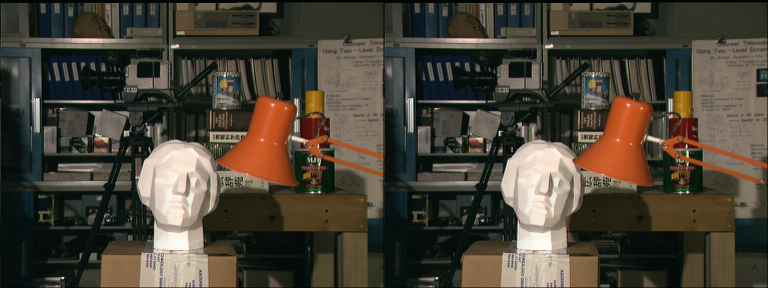

In [141]:
using Images
left = load("left.png")
right = load("right.png")
height = size(left)[1]
width = size(left)[2]
display([left right])

In [142]:
function make_gray(image, h, w)
    new_image = zeros(Int8, h, w)
    for i in 1:h
        for j in 1:w
            new_image[i, j] = (image[i,j].r.i + image[i,j].g.i + image[i,j].b.i) ÷ 3
        end
    end
    return new_image
end
left = make_gray(left, height, width)
right = make_gray(right, height, width);

In [143]:
SAD(A::Matrix{Int8}, B::Matrix{Int8}) = sum(map((x,y) -> abs(x-y), A, B))

SAD (generic function with 2 methods)

In [144]:
function go(S, D)
    pixel_differences =  zeros(Int16, height, width)
    for line in 1:height-S
        for i in 1:width-S
            left_block = left[line:line+S-1, i:i+S-1]
            start = i - D
            if start < 1
                start = 1
            end
            finish = i + D
            if finish > width - S
                finish = width - S
            end
                     
            dif = 0
            min_sad = 0xfffffff
            for j in start:finish
                current_error = SAD(left_block, right[line:line+S-1, j:j+S-1])
                if current_error < min_sad
                    min_sad = current_error
                    dif = abs(j-i)
                end
            end
            pixel_differences[line, i] = dif
        end
    end
    return pixel_differences
end

go (generic function with 1 method)

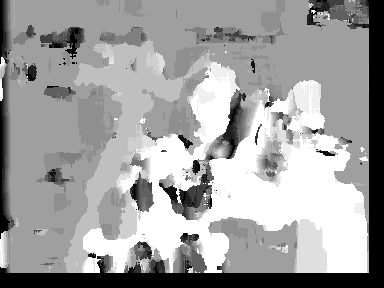

In [151]:
disparity_map = go(15, 16)
max = maximum(disparity_map)
display(Gray.(map((x) -> x / max, disparity_map)))